In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv')
df.sample(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
17794,17794,403-8711179-7267509,04-20-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3689,JNE3689-TU-XXL,Top,...,INR,434.0,KOLKATA,WEST BENGAL,700075.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
17170,17170,404-7844235-7197136,04-20-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET332,SET332-KR-PP-M,Set,...,INR,549.0,THIRUVANANTHAPURAM,KERALA,695003.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
114762,114762,404-4165685-6901945,06-10-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3798,JNE3798-KR-XXXL,Western Dress,...,INR,725.0,BENGALURU,KARNATAKA,560077.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
72709,72709,405-1793377-0593918,05-12-22,Shipped,Amazon,Amazon.in,Expedited,JNE3712,JNE3712-TP-N-L,Top,...,INR,518.0,MUMBAI,MAHARASHTRA,400063.0,IN,NaN,False,NaN,False
104944,104944,406-8627446-6473152,06-17-22,Shipped,Amazon,Amazon.in,Expedited,JNE3334,JNE3334-KR-XXL,kurta,...,INR,318.0,PUNE,MAHARASHTRA,412406.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [3]:
df = df.drop(labels = ['index' , 'Order ID', 'Unnamed: 22', 'ship-postal-code'], axis = 1)


In [4]:
df.info

<bound method DataFrame.info of             Date                        Status Fulfilment Sales Channel   \
0       04-30-22                     Cancelled   Merchant      Amazon.in   
1       04-30-22  Shipped - Delivered to Buyer   Merchant      Amazon.in   
2       04-30-22                       Shipped     Amazon      Amazon.in   
3       04-30-22                     Cancelled   Merchant      Amazon.in   
4       04-30-22                       Shipped     Amazon      Amazon.in   
...          ...                           ...        ...            ...   
128970  05-31-22                       Shipped     Amazon      Amazon.in   
128971  05-31-22                       Shipped     Amazon      Amazon.in   
128972  05-31-22                       Shipped     Amazon      Amazon.in   
128973  05-31-22                       Shipped     Amazon      Amazon.in   
128974  05-31-22                       Shipped     Amazon      Amazon.in   

       ship-service-level    Style              SKU    

In [5]:
df.isnull().sum()

Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
dtype: int64

In [6]:
df=df.fillna(method = 'bfill', axis=0)

In [7]:
df.isnull().sum()

Date                   0
Status                 0
Fulfilment             0
Sales Channel          0
ship-service-level     0
Style                  0
SKU                    0
Category               0
Size                   0
ASIN                   0
Courier Status         0
Qty                    0
currency               0
Amount                 0
ship-city              0
ship-state             0
ship-country           0
promotion-ids          0
B2B                    0
fulfilled-by          83
dtype: int64

In [8]:
df=df.fillna(0)

In [9]:
df.dtypes

Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
dtype: object

In [10]:
df['ship-city'].value_counts() 

BENGALURU                                      11221
HYDERABAD                                       8076
MUMBAI                                          6126
NEW DELHI                                       5798
CHENNAI                                         5421
                                               ...  
Khandavalli, peravali mandal, west godavari        1
Bhayander west                                     1
JAKHALMANDI                                        1
Arariya                                            1
Halol                                              1
Name: ship-city, Length: 8955, dtype: int64

In [11]:
df[['Qty','Amount']].groupby(df['Fulfilment']).mean()

,Qty,Amount
Fulfilment,,
Amazon,0.937446,649.273232
Merchant,0.829035,646.859903


In [12]:
df['Amount'].groupby(df['Fulfilment']).sum()

Fulfilment
Amazon      58238510.40
Merchant    25406716.41
Name: Amount, dtype: float64

In [13]:
df['Amount'].groupby(df['Category']).count()

Category
Blouse             926
Bottom             440
Dupatta              3
Ethnic Dress      1159
Saree              164
Set              50284
Top              10622
Western Dress    15500
kurta            49877
Name: Amount, dtype: int64

In [14]:
df['Amount'].groupby(df['Status']).max()

Status
Cancelled                        4235.72
Pending                          1672.00
Pending - Waiting for Pick Up    2326.00
Shipped                          5584.00
Shipped - Damaged                1136.00
Shipped - Delivered to Buyer     5495.00
Shipped - Lost in Transit         999.00
Shipped - Out for Delivery       1399.00
Shipped - Picked Up              1998.00
Shipped - Rejected by Buyer       967.00
Shipped - Returned to Seller     2796.00
Shipped - Returning to Seller    1976.00
Shipping                          999.00
Name: Amount, dtype: float64

In [15]:
df['Status'].value_counts()

Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: Status, dtype: int64

In [16]:
# avrage of variables in ship city and ship state
a = df.groupby(['ship-state', 'ship-city'])
a.mean()

Qty      Amount  \
ship-state         ship-city                                                 
ANDAMAN & NICOBAR  Andaman and nicobar islands port Blair  1.0  999.000000   
                   BAMBOOFLAT                              0.8  720.824000   
                   FERRARGUNJ                              0.9  596.300000   
                   GARACHARMA                              1.0  307.000000   
                   GREAT NICOBAR                           1.0  657.666667   
...                                                        ...         ...   
punjab             phagwara                                1.0  472.000000   
rajasthan          jaipur                                  1.0  439.000000   
                   madanganj-kishangarh  ajmer             1.0  872.000000   
                   sriganganagar                           1.0  885.000000   
rajsthan           Bheem                                   1.0  521.000000   

                                                           B2B  
ship-state         ship-city                                    
ANDAMAN & NICOBAR  Andaman and nicobar islands port Blair  0.0  
                   BAMBOOFLAT                              0.0  
                   FERRARGUNJ                              0.0  
                   GARACHARMA                              0.0  
                   GREAT NICOBAR                           0.0  
...                                                        ...  
punjab             phagwara                                0.0  
rajasthan          jaipur                                  0.0  
                   madanganj-kishangarh  ajmer             0.0  
                   sriganganagar                           0.0  
rajsthan           Bheem                                   0.0  

[9148 rows x 3 columns]

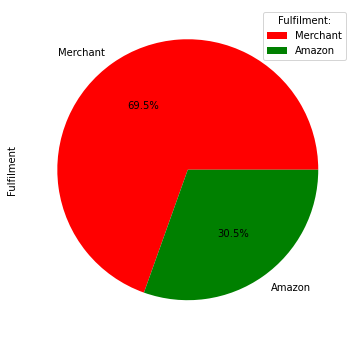

In [17]:
plt.figure(1, figsize=(6,6))
df['Fulfilment'].value_counts().plot.pie(autopct="%1.1f%%",colors = ( "r", "g"),labels = df['Fulfilment'].unique(), shadow = False)
plt.legend(title = "Fulfilment:")
plt.show()

<AxesSubplot:xlabel='Courier Status', ylabel='count'>

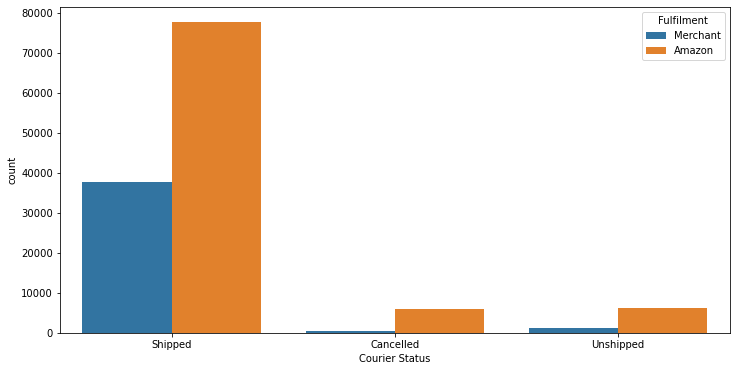

In [18]:
plt.figure(figsize = (12, 6))

sns.countplot(x = 'Courier Status', hue = 'Fulfilment', data = df)

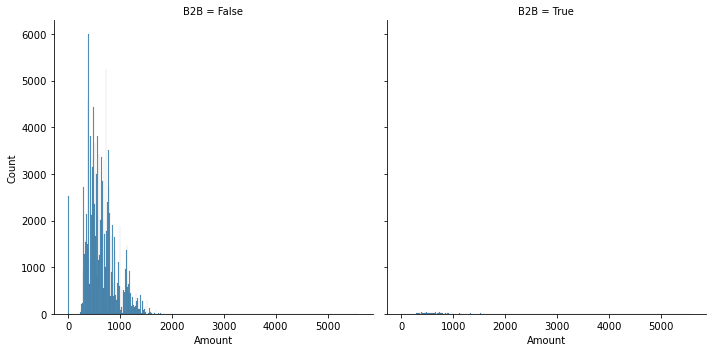

In [19]:
sns.displot(data = df, x = 'Amount', col = 'B2B');

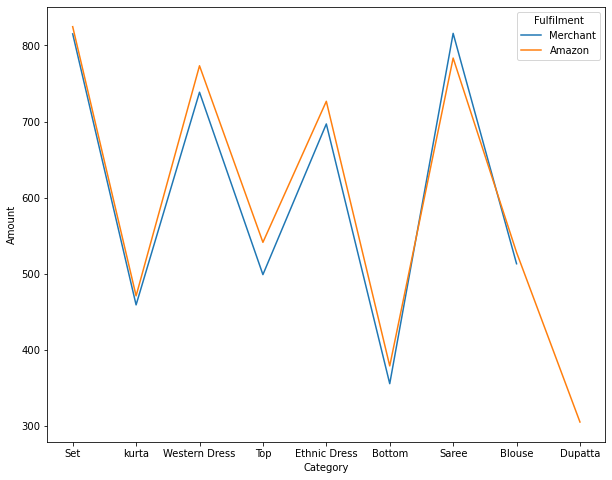

In [20]:
plt.figure(figsize = (10, 8))

sns.lineplot(x = 'Category', y = 'Amount', hue = 'Fulfilment', ci = None,
             estimator = 'mean', data = df);